In [104]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from spacy.lang.en.stop_words import STOP_WORDS
import re

In [97]:
df = pd.read_csv("./hellofashionblog.csv", sep=',', 
                 encoding = 'utf8', header=None, 
                 names=["doc", "text"])
df.head()

,doc,text
0,https://scontent-arn2-1.cdninstagram.com/t51.2...,Love this Hairstyle 😍😍 Gorgeous A gift guide f...
1,https://scontent-arn2-1.cdninstagram.com/t51.2...,Cutest bffs ever 🧡🧡 Cuties! Love this! 💕 This ...
2,https://scontent-arn2-1.cdninstagram.com/t51.2...,this is precious !!! The perfect couple Casual...
3,https://scontent-arn2-1.cdninstagram.com/t51.2...,LOVE ❤️!! Gorgeous in red! Obsessed ❤️❤️ Prett...
4,https://scontent-arn2-1.cdninstagram.com/t51.2...,Love love love this pic! 🙌🏼❤️✨✨✨ U and ur girl...


In [98]:
# Drop NANs to avoid SpaCy errors
df = df.dropna(subset=['doc', 'text'])

In [99]:
# Parse with Spacy
nlp = spacy.load("en_vectors_web_lg")
docs = []
for index, row in df.iterrows():
    docs.append((row["doc"], nlp(row["text"])))

In [100]:
# Load domain knowledge
fashion_df = pd.read_csv("./domain_data/items.csv", sep=',', 
                 encoding = 'utf8', header=None, 
                 names=["word"])
companies_df = pd.read_csv("./domain_data/companies.csv", sep=',', 
                 encoding = 'utf8', header=None, 
                 names=["word"])
style_df = pd.read_csv("./domain_data/general_style.csv", sep=',', 
                 encoding = 'utf8', header=None, 
                 names=["word"])
material_df = pd.read_csv("./domain_data/material.csv", sep=',', 
                 encoding = 'utf8', header=None, 
                 names=["word"])

In [101]:
def getUniqueLemmas(tokens):
    fashionLemmas = []
    for token in tokens:
        for lemmaToken in nlp(token.lemma_):
            fashionLemmas.append(lemmaToken)
    lemmasText = set()
    temp = []
    for token in fashionLemmas:
        if token.text not in lemmasText:
            temp.append(token)
        lemmasText.add(token.text)
    fashionLemmas = temp
    return fashionLemmas

In [102]:
item_docs = []
for index, row in fashion_df.iterrows():
    item_docs.append(nlp(row["word"]))
itemTokens = allTokens(item_docs)
itemLemmas = getUniqueLemmas(itemTokens)

companiesWords = set(companies_df["word"])

style_docs = []
for index, row in style_df.iterrows():
    style_docs.append(nlp(row["word"]))
styleTokens = allTokens(style_docs)
styleLemmas = getUniqueLemmas(styleTokens)

material_docs = []
for index, row in material_df.iterrows():
    material_docs.append(nlp(row["word"]))
materialTokens = allTokens(material_docs)
materialLemmas = getUniqueLemmas(materialTokens)

In [103]:
companiesWords
len(companiesWords)

1363

In [206]:
def allTokens(docs):
    tokens = []
    for doc in docs:
        for token in doc:
            tokens.append(token)
    return tokens

def similar(word, lemmas, t):
    matchCount = 0
    for lemma in lemmas:
        if word.similarity(lemma) > t:
            matchCount += 1
    return matchCount

def findMatches(doc, t):
    liketoknowitMatch = 0
    itemMatch = 0
    companiesMatch = 0
    styleMatch = 0
    materialMatch = 0
    match = re.search("http://liketk.it/([^\s]+)", doc.text)
    if match is not None:
        liketoknowitMatch += 1
    for token in doc:
        if token not in STOP_WORDS:
            itemMatch += similar(token, itemLemmas, t)
            styleMatch += similar(token, styleLemmas, t)
            materialMatch += similar(token, materialLemmas, t)
        if token.text in companiesWords:
            companiesMatch += 1
            
    return itemMatch, companiesMatch, styleMatch, materialMatch, liketoknowitMatch

In [123]:
%%time
itemMatches = []
companyMatches = []
styleMatches = []
materialMatches = []
liketoknowitMatches = []
docNames = []
for i, doc in enumerate(docs):
    if i % 10 == 0:
        print "analyzed {0} documents out of {1}".format(i, len(docs))
    items, companies, styles, materials, liketoknowitLinks = findMatches(doc[1], 0.7)
    itemMatches.append(items)
    companyMatches.append(companies)
    styleMatches.append(styles)
    materialMatches.append(materials)
    liketoknowitMatches.append(liketoknowitLinks)
    docNames.append(doc[0])

analyzed 0 documents out of 3152
analyzed 10 documents out of 3152
analyzed 20 documents out of 3152
analyzed 30 documents out of 3152
analyzed 40 documents out of 3152
analyzed 50 documents out of 3152
analyzed 60 documents out of 3152
analyzed 70 documents out of 3152
analyzed 80 documents out of 3152
analyzed 90 documents out of 3152
analyzed 100 documents out of 3152
analyzed 110 documents out of 3152
analyzed 120 documents out of 3152
analyzed 130 documents out of 3152
analyzed 140 documents out of 3152
analyzed 150 documents out of 3152
analyzed 160 documents out of 3152
analyzed 170 documents out of 3152
analyzed 180 documents out of 3152
analyzed 190 documents out of 3152
analyzed 200 documents out of 3152
analyzed 210 documents out of 3152
analyzed 220 documents out of 3152
analyzed 230 documents out of 3152
analyzed 240 documents out of 3152
analyzed 250 documents out of 3152
analyzed 260 documents out of 3152
analyzed 270 documents out of 3152
analyzed 280 documents out of 3

analyzed 2310 documents out of 3152
analyzed 2320 documents out of 3152
analyzed 2330 documents out of 3152
analyzed 2340 documents out of 3152
analyzed 2350 documents out of 3152
analyzed 2360 documents out of 3152
analyzed 2370 documents out of 3152
analyzed 2380 documents out of 3152
analyzed 2390 documents out of 3152
analyzed 2400 documents out of 3152
analyzed 2410 documents out of 3152
analyzed 2420 documents out of 3152
analyzed 2430 documents out of 3152
analyzed 2440 documents out of 3152
analyzed 2450 documents out of 3152
analyzed 2460 documents out of 3152
analyzed 2470 documents out of 3152
analyzed 2480 documents out of 3152
analyzed 2490 documents out of 3152
analyzed 2500 documents out of 3152
analyzed 2510 documents out of 3152
analyzed 2520 documents out of 3152
analyzed 2530 documents out of 3152
analyzed 2540 documents out of 3152
analyzed 2550 documents out of 3152
analyzed 2560 documents out of 3152
analyzed 2570 documents out of 3152
analyzed 2580 documents out 

In [197]:
#Save results from the long computation
np.savetxt('results/item_matches.txt', np.asarray(itemMatches), delimiter=',')
np.savetxt('results/company_matches.txt', np.asarray(companyMatches), delimiter=',')
np.savetxt('results/style_matches.txt', np.asarray(styleMatches), delimiter=',')
np.savetxt('results/material_matches.txt', np.asarray(materialMatches), delimiter=',')
np.savetxt('results/liketoknowit_matches.txt', np.asarray(liketoknowitMatches), delimiter=',')
np.savetxt('results/docNames.txt', np.asarray(docNames), delimiter=',', fmt="%s")

In [131]:
from collections import Counter

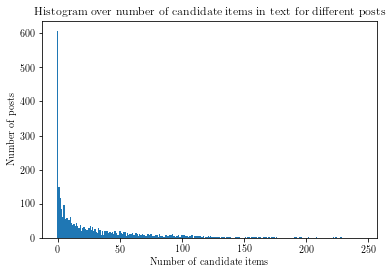

In [207]:
labels, values = zip(*Counter(itemMatches).items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.ylabel('Number of posts')
plt.xlabel('Number of candidate items')
plt.title(r'Histogram over number of candidate items in text for different posts')
plt.savefig('figures/candidate_items_hist.pdf', format='pdf', dpi=1000)
plt.show()

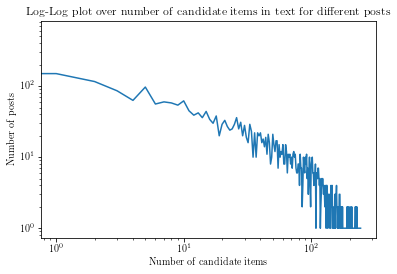

In [208]:
plt.loglog(indexes, values)
plt.ylabel('Number of posts')
plt.xlabel('Number of candidate items')
plt.title(r'Log-Log plot over number of candidate items in text for different posts')
plt.savefig('figures/candidate_items_loglog.pdf', format='pdf', dpi=1000)
plt.show()

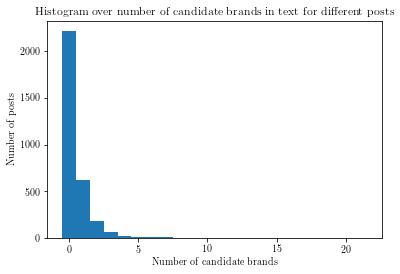

In [209]:
labels, values = zip(*Counter(companyMatches).items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.ylabel('Number of posts')
plt.xlabel('Number of candidate brands')
plt.title(r'Histogram over number of candidate brands in text for different posts')
plt.savefig('figures/candidate_brands_hist.pdf', format='pdf', dpi=1000)
plt.show()

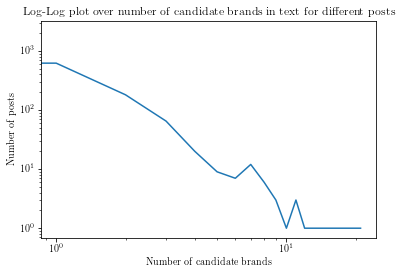

In [210]:
plt.loglog(indexes, values)
plt.ylabel('Number of posts')
plt.xlabel('Number of candidate brands')
plt.title(r'Log-Log plot over number of candidate brands in text for different posts')
plt.savefig('figures/candidate_brands_loglog.pdf', format='pdf', dpi=1000)
plt.show()

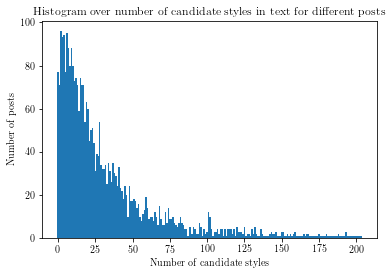

In [211]:
labels, values = zip(*Counter(styleMatches).items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.ylabel('Number of posts')
plt.xlabel('Number of candidate styles')
plt.title(r'Histogram over number of candidate styles in text for different posts')
plt.savefig('figures/candidate_styles_hist.pdf', format='pdf', dpi=1000)
plt.show()

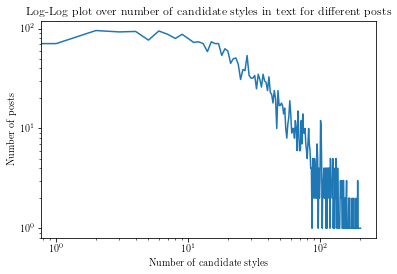

In [212]:
plt.loglog(indexes, values)
plt.ylabel('Number of posts')
plt.xlabel('Number of candidate styles')
plt.title(r'Log-Log plot over number of candidate styles in text for different posts')
plt.savefig('figures/candidate_styles_loglog.pdf', format='pdf', dpi=1000)
plt.show()

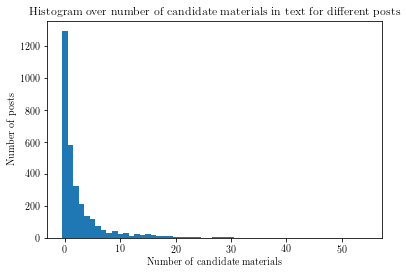

In [213]:
labels, values = zip(*Counter(materialMatches).items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.ylabel('Number of posts')
plt.xlabel('Number of candidate materials')
plt.title(r'Histogram over number of candidate materials in text for different posts')
plt.savefig('figures/candidate_material_hist.pdf', format='pdf', dpi=1000)
plt.show()

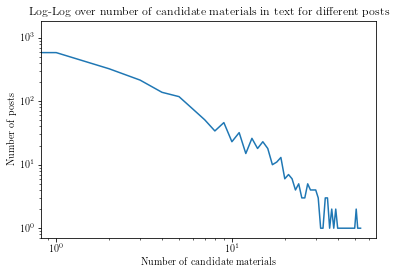

In [214]:
plt.loglog(indexes, values)
plt.ylabel('Number of posts')
plt.xlabel('Number of candidate materials')
plt.title(r'Log-Log over number of candidate materials in text for different posts')
plt.savefig('figures/candidate_material_loglog.pdf', format='pdf', dpi=1000)
plt.show()

In [250]:

def similar2(word, lemmas, t):
    return list(filter(lambda w: word.similarity(w) > t, lemmas))

def findMatches2(doc, t):
    liketoknowitMatch = 0
    itemMatch = []
    companiesMatch = []
    styleMatch = []
    materialMatch = []
    match = re.search("http://liketk.it/([^\s]+)", doc.text)
    if match is not None:
        liketoknowitMatch += 1
    for token in doc:
        if token not in STOP_WORDS:
            itemMatch = itemMatch + similar2(token, itemLemmas, t)
            styleMatch = styleMatch + similar2(token, styleLemmas, t)
            materialMatch = materialMatch + similar2(token, materialLemmas, t)
        if token.text in companiesWords:
            companiesMatch.append(token.text)
            
    return itemMatch, companiesMatch, styleMatch, materialMatch, liketoknowitMatch

In [251]:
%%time
itemMatches2 = []
companyMatches2 = []
styleMatches2 = []
materialMatches2 = []
liketoknowitMatches2 = []
docNames2 = []
for i, doc in enumerate(docs):
    if i % 10 == 0:
        print "analyzed {0} documents out of {1}".format(i, len(docs))
    items, companies, styles, materials, liketoknowitLinks = findMatches2(doc[1], 0.7)
    itemMatches2 = itemMatches2 + items
    companyMatches2 = companyMatches2 + companies
    styleMatches2 = styleMatches2 + styles
    materialMatches2 = materialMatches2 + materials
    liketoknowitMatches2.append(liketoknowitLinks)
    docNames2.append(doc[0])

analyzed 0 documents out of 3152
analyzed 10 documents out of 3152
analyzed 20 documents out of 3152
analyzed 30 documents out of 3152
analyzed 40 documents out of 3152
analyzed 50 documents out of 3152
analyzed 60 documents out of 3152
analyzed 70 documents out of 3152
analyzed 80 documents out of 3152
analyzed 90 documents out of 3152
analyzed 100 documents out of 3152
analyzed 110 documents out of 3152
analyzed 120 documents out of 3152
analyzed 130 documents out of 3152
analyzed 140 documents out of 3152
analyzed 150 documents out of 3152
analyzed 160 documents out of 3152
analyzed 170 documents out of 3152
analyzed 180 documents out of 3152
analyzed 190 documents out of 3152
analyzed 200 documents out of 3152
analyzed 210 documents out of 3152
analyzed 220 documents out of 3152
analyzed 230 documents out of 3152
analyzed 240 documents out of 3152
analyzed 250 documents out of 3152
analyzed 260 documents out of 3152
analyzed 270 documents out of 3152
analyzed 280 documents out of 3

analyzed 2310 documents out of 3152
analyzed 2320 documents out of 3152
analyzed 2330 documents out of 3152
analyzed 2340 documents out of 3152
analyzed 2350 documents out of 3152
analyzed 2360 documents out of 3152
analyzed 2370 documents out of 3152
analyzed 2380 documents out of 3152
analyzed 2390 documents out of 3152
analyzed 2400 documents out of 3152
analyzed 2410 documents out of 3152
analyzed 2420 documents out of 3152
analyzed 2430 documents out of 3152
analyzed 2440 documents out of 3152
analyzed 2450 documents out of 3152
analyzed 2460 documents out of 3152
analyzed 2470 documents out of 3152
analyzed 2480 documents out of 3152
analyzed 2490 documents out of 3152
analyzed 2500 documents out of 3152
analyzed 2510 documents out of 3152
analyzed 2520 documents out of 3152
analyzed 2530 documents out of 3152
analyzed 2540 documents out of 3152
analyzed 2550 documents out of 3152
analyzed 2560 documents out of 3152
analyzed 2570 documents out of 3152
analyzed 2580 documents out 

In [252]:
#Save results from the long computation
np.savetxt('results/item_matches2.txt', np.asarray(itemMatches2), delimiter=',', fmt="%s")
np.savetxt('results/company_matches2.txt', np.asarray(companyMatches2), delimiter=',', fmt="%s")
np.savetxt('results/style_matches2.txt', np.asarray(styleMatches2), delimiter=',', fmt="%s")
np.savetxt('results/material_matches2.txt', np.asarray(materialMatches2), delimiter=',', fmt="%s")
np.savetxt('results/liketoknowit_matches2.txt', np.asarray(liketoknowitMatches2), delimiter=',', fmt="%s")
np.savetxt('results/docNames2.txt', np.asarray(docNames2), delimiter=',', fmt="%s")

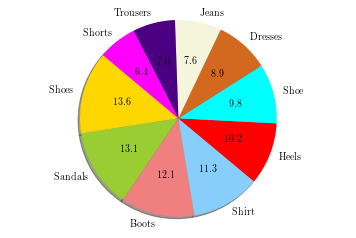

In [308]:
counter = Counter(itemMatches2)
labels = []
counts = []
for label, count in counter.most_common(10):
    labels.append(label)
    counts.append(count)
#labels = ["contains no liketoknowit link","contains liketoknowit link"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "red", "aqua", "chocolate", "beige", "indigo", "magenta"]
plt.pie(counts, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('figures/style_itempie.pdf', format='pdf', dpi=1000)
plt.show()

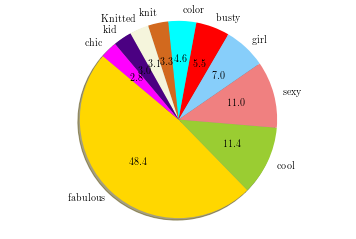

In [309]:
counter = Counter(styleMatches2)
labels = []
counts = []
for label, count in counter.most_common(10):
    labels.append(label)
    counts.append(count)
#labels = ["contains no liketoknowit link","contains liketoknowit link"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "red", "aqua", "chocolate", "beige", "indigo", "magenta"]
plt.pie(counts, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('figures/style_stylepie.pdf', format='pdf', dpi=1000)
plt.show()

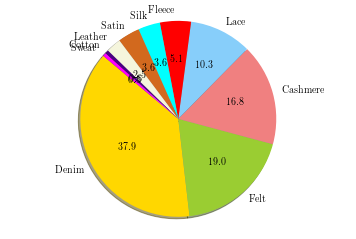

In [310]:
counter = Counter(materialMatches2)
labels = []
counts = []
for label, count in counter.most_common(10):
    labels.append(label)
    counts.append(count)
#labels = ["contains no liketoknowit link","contains liketoknowit link"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "red", "aqua", "chocolate", "beige", "indigo", "magenta"]
plt.pie(counts, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('figures/style_materialpie.pdf', format='pdf', dpi=1000)
plt.show()

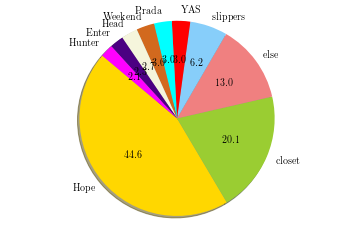

In [311]:
counter = Counter(companyMatches2)
labels = []
counts = []
for label, count in counter.most_common(10):
    labels.append(label)
    counts.append(count)
#labels = ["contains no liketoknowit link","contains liketoknowit link"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "red", "aqua", "chocolate", "beige", "indigo", "magenta"]
plt.pie(counts, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('figures/style_companypie.pdf', format='pdf', dpi=1000)
plt.show()

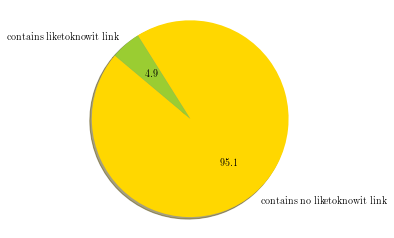

In [236]:
labels, values = zip(*Counter(liketoknowitMatches2).items())
labels = ["contains no liketoknowit link","contains liketoknowit link"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "red"]
plt.pie(values, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('figures/liketoknowit_fraction.pdf', format='pdf', dpi=1000)
plt.show()

In [313]:
counter = Counter(itemMatches2)
commonItems = []
for label, count in counter.most_common(40):
    commonItems.append(label)
    
items = []
itemVecs = []
for item in commonItems:
    if item.text not in items:
        items.append(item.text)
        itemVecs.append(item.vector)

In [314]:
len(itemVecs)

40

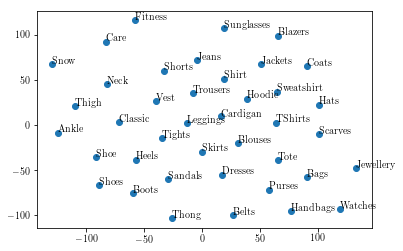

In [315]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(itemVecs)
df = pd.DataFrame(X_tsne, index=items, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.savefig('figures/style_itemscatter.pdf', format='pdf', dpi=1000)
plt.show()

In [316]:
counter = Counter(companyMatches2)
commonCompanies = []
for label, count in counter.most_common(40):
    commonCompanies.append(label)
items = []
itemVecs = []
for item in commonCompanies:
    if item not in items:
        d = nlp(item)
        items.append(item)
        itemVecs.append(d[0].vector)

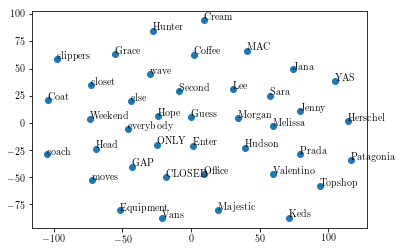

In [317]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(itemVecs)
df = pd.DataFrame(X_tsne, index=items, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.savefig('figures/style_brandscatter.pdf', format='pdf', dpi=1000)
plt.show()

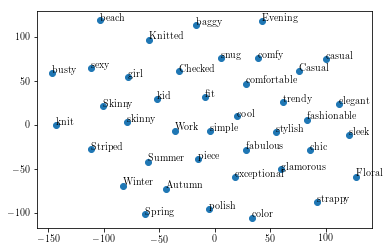

In [318]:
counter = Counter(styleMatches2)
commonStyles = []
for label, count in counter.most_common(40):
    commonStyles.append(label)
items = []
itemVecs = []
for item in commonStyles:
    if item.text not in items:
        items.append(item.text)
        itemVecs.append(item.vector)
        
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(itemVecs)
df = pd.DataFrame(X_tsne, index=items, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.savefig('figures/style_stylescatter.pdf', format='pdf', dpi=1000)
plt.show()

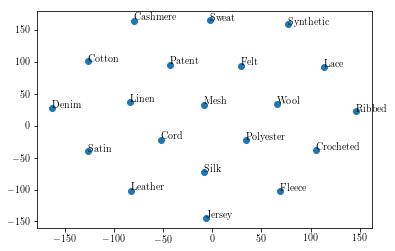

In [319]:
counter = Counter(materialMatches2)
commonStyles = []
for label, count in counter.most_common(40):
    commonStyles.append(label)
items = []
itemVecs = []
for item in commonStyles:
    if item.text not in items:
        items.append(item.text)
        itemVecs.append(item.vector)
        
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(itemVecs)
df = pd.DataFrame(X_tsne, index=items, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.savefig('figures/style_materialscatter.pdf', format='pdf', dpi=1000)
plt.show()

In [307]:
len(commonStyles)

20

In [231]:
labels, values = zip(*Counter(liketoknowitMatches2).items())

In [232]:
labels

(0, 1)

In [240]:
itemLemmas

[Blouses,
 Tunics,
 Coats,
 Dresses,
 Jackets,
 Jeans,
 Jumpers,
 Cardiagans,
 Skirts,
 Tights,
 Socks,
 Tops,
 TShirts,
 Trousers,
 Shorts,
 Shoes,
 Bags,
 Collar,
 Athletic,
 Lightweight,
 Blazers,
 Gilets,
 WaistCoats,
 Capes,
 Cocktail,
 Jersey,
 Shirt,
 Trench,
 ClutchBag,
 Handbags,
 Tote,
 ShoulderBag,
 Rucksacks,
 Sport&Travel,
 LaptopBag,
 Leggings,
 Thigh,
 Ankle,
 Ballet,
 Pumps,
 Boots,
 Flats,
 FlipFlops,
 Beachshoes,
 Heels,
 Mules,
 Clogs,
 Sandals,
 Shoe,
 Care,
 Slippers,
 Sportsshoes,
 Trainers,
 Ankleboots,
 Classic,
 Cowboy,
 Biker,
 Heeled,
 Balletpumps,
 Snow,
 Wellies,
 Brogues,
 Espadrilles,
 Loafers,
 Moccasins,
 Fitness,
 Watersports,
 Hiking,
 HillWalking,
 Cycling,
 Thong,
 Belts,
 Gloves,
 Hats,
 Caps,
 Jewellery,
 Watches,
 Purses,
 Scarves,
 Shawls,
 Sunglasses,
 Polo,
 Neck,
 Parkas,
 Hoodie,
 Sweatshirt,
 Cardigan,
 Sleeve,
 Vest,
 Chinos,
 Joggers,
 Sweats,
 Playsuits,
 Jumpsuits,
 heeledankleboots,
 classicankleboots,
 cowboyboots,
 bikerankleboots,
 